## 1. Naïve Bayes

Naïve Bayes 모형을 이용해서 스팸 SMS를 판별하는 모형을 만들고자 한다. 수업에서 사용했던 spam 데이터를 그대로 사용하는데 이 데이터는 각 SMS에 특정 단어가 등장한 빈도와 최종 output 값을 포함하고 있다. 최종 target을 ‘target’이라는 이름으로 되어 있고 여기서 스팸인 경우 1, 스팸이 아닌 경우 0이라고 되어 있다. target 앞 쪽의 모든 변수는 특정 단어를 의미한다.

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

sms=pd.read_csv('https://drive.google.com/uc?export=download&id=1l6gUFvs4PNoY2OVg44hCNmOREfEsx2qX')
X=sms[sms.columns[:-1]]
y=sms[sms.columns[-1]]
trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)

(1) Multinomial naïve Bayes 모형을 이용해서 세팅이 변경없이 학습용 데이터로 학습을 하고 검증용 데이터를 이용해서 정확도(accuracy), recall, precision, f1 값을 구하시오 (스팸을 기준으로 계산할 것).

In [56]:
#spam: 1, ham: 0 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

multiNB=MultinomialNB()
multiNB.fit(trnX,trnY) #훈련 데이터 학습

y_pred=multiNB.predict(valX)

print('accuracy score:', accuracy_score(valY, y_pred))
print('recall score:', recall_score(valY, y_pred)) #실제 1(spam)인 것 중에서 약 87%만 실제로 1이라고 예측됨
print('precision score:', precision_score(valY, y_pred)) #1(spam)이라고 예측된 것 중에서 실제 1이라고 예측한 것의 비율
print('f1 score:', f1_score(valY, y_pred))

accuracy score: 0.9657534246575342
recall score: 0.8716216216216216
precision score: 0.8896551724137931
f1 score: 0.8805460750853241


In [57]:
#위의 결과와 동일하다는 것을 알 수 있음
from sklearn.metrics import classification_report

print(classification_report(valY, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       874
           1       0.89      0.87      0.88       148

    accuracy                           0.97      1022
   macro avg       0.93      0.93      0.93      1022
weighted avg       0.97      0.97      0.97      1022



(2) 학습된 Multinomial naïve Bayes 모형으로부터 서로 다른 두 group(스팸 SMS와 스팸이 아닌 SMS)에서 확률이 높은 단어 상위 10개씩을 찾으시오. (10점)
참고: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html

In [58]:
col_list=pd.DataFrame(trnX).columns.tolist()
fit=np.exp(multiNB.feature_log_prob_)

ham=(np.argsort(fit[0])[::-1][:10]).tolist()
spam=(np.argsort(fit[1])[::-1][:10]).tolist()

print('스팸이 아닌 SMS 에서 확률이 높은 상위 10개의 단어:')

for i in range(len(ham)):
    ind=ham[i]
    print(ham[i], col_list[ind])

    
print('\n스팸 SMS 에서 확률이 높은 상위 10개의 단어:')
for i in range(len(spam)):
    ind=spam[i]
    print(spam[i], col_list[ind])


스팸이 아닌 SMS 에서 확률이 높은 상위 10개의 단어:
43 go
41 get
12 call
22 come
76 lt
48 gt
99 ok
69 like
75 love
27 day

스팸 SMS 에서 확률이 높은 상위 10개의 단어:
12 call
39 free
150 txt
152 ur
139 text
86 mobil
134 stop
18 claim
114 repli
170 www


(3) 전체 문서에서 등장 빈도가 높은 단어 30개를 찾고 그 단어에 대해서 서로 다른 두 group에서의 학습된 multinomial naïve Bayes에서 추정한 단어들의 확률을 가로 막대 그래프로 그리시오. (겹쳐서 그리기 위해서 투명도인 alpha=0.5로 설정). 이 때 서로 다른 두 group은 같은 figure에 그리고 범주를 넣으시오. 
참고: https://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html   

In [59]:
X_sum=X.sum()
X_upsum_30=X_sum.sort_values(ascending=False)[:30]
print(X_upsum_30)

call     695
go       462
get      458
ur       391
gt       318
lt       316
come     305
day      293
ok       293
free     288
know     275
love     266
like     261
time     254
want     248
good     248
got      241
text     233
send     214
txt      197
need     190
one      185
today    181
take     174
see      173
stop     173
home     167
think    166
repli    164
lor      162
dtype: int64


In [120]:
y_=y.to_numpy()
print(y_)

[0 0 0 ... 1 1 1]


In [6]:
y_=y.to_numpy()
y_=np.sort(y_)

for c in np.unique(y_):
    plt.hist(X[y_==c,], bins=15, label=str(c), alpha=0.5)
    
plt.legend()

(4) Bernoulli naïve Bayes 모형을 이용해서 세팅 변경 없이 train set으로 학습을 하고 test set을 이용해서 정확도(accuracy), recall, precision, f1 값을 구하시오 (스팸을 기준으로 계산할 것). 이 때 input matrix는 train set, test set 모두 특정 단어가 1번 이상이라도 쓰였으면 1, 아니면 0으로 변환하여 사용하시오. (1)의 결과와 비교하여 어느 쪽이 더 나은 모형인지 설명하시오. 이 결과로부터 알 수 있는 사실은 무엇인가?

In [7]:
X=sms[sms.columns[:-1]]
sms[sms.columns[-1]]=(X.isin(['1'])).astype(int)
y=sms[sms.columns[-1]]

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)

multiNB=MultinomialNB()
multiNB.fit(trnX,trnY)
y_pred=multiNB.predict(valX)

print(classification_report(valY, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1005
           1       0.89      0.94      0.91        17

    accuracy                           1.00      1022
   macro avg       0.94      0.97      0.96      1022
weighted avg       1.00      1.00      1.00      1022



In [ ]:
#모델 성능 비교에 대한 설명: 정확도/recall/precision/f1의 값을 비교 했을 때
#train set, test set 모두 특정 단어가 1번 이상이라도 쓰인 경우의 모형이 더 나은 모델이다.

(5) 학습된 Bernoulli naïve Bayes 모형으로 test set의 sample별로 각 class에 대한 posterior probability를 구하고 서로 다른 cutoff를 기준이로 output label을 결정(spam을 기준으로 spam일 확률이 cutoff 값이면 spam으로 분류)하고 이에 따른 정확도를 구하시오. 그리고 cutoff를 X축으로 정확도를 Y축으로 해서 그래프를 그리시오. (cutoff∈{0.1,0.15,0.2,0.25,...,0.95}) (9점)

In [26]:
import numpy as np

C=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]


classifier=MultinomialNB()
classifier.fit(trnX,trnY)

y_pred=classifier.predict(valX)

y_prob=classifier.predict_proba(trnX)
print(y_prob)

[[9.86447149e-01 1.35528515e-02]
 [9.88511145e-01 1.14888546e-02]
 [9.75493984e-01 2.45060158e-02]
 ...
 [9.99659292e-01 3.40708342e-04]
 [9.91865238e-01 8.13476190e-03]
 [9.99976926e-01 2.30739064e-05]]


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import pandas as pd

sk_fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
result=pd.DataFrame(columns=['C','fold','Acc','Recall','Precision','F1'])

count=0
for fold, (train_indices, test_indices) in enumerate(sk_fold.split(X,y)):
    for c in C:
        classifier.C=c
        classifier.fit(X[train_indices], y[train_indices])
        y_pred=classifer.predict(X[test_indies])
        result.loc[count]=[c,fold,accuracy_score(y[test_indices],y_pred),
                          recall_score(y[test_indices],y_pred), precision_score(y[test_indices],y_pred),
                          f1_score(y[test_indices],y_pred)]
        count+=1
        
result.groupby(['C'])[['Acc','Recall','Precision','F1']].mean()

## 2. Decision tree
다음 요소를 바탕으로 연간 소득이 50,000 달러는 초과(“>50K”)하는지 아닌지(“<=50K”)를 판별하고 한다.
1. age: 연령
2. capital-gain: 자본 소득
3. capital-loss: 자본 손실
4. hours-per-week: 주당 근무 시간
5. sex: 남자 1, 여자 0
6. native-country: 미국 1, 다른 나라 0
7. workclass_[#]: 특정 고용 상황(#로 표시)에 해당하면 1, 아니면 0 (예를 들어 workclass_Private은 민간 회사에 고용되어 있으면 1 아니면 0)
8. education_[#]: 특정 최종 학력(#로 표시)에 해당하면 1, 아니면 0 (Graduate=석, 박사 학위 취득, 4-year university=4년제 대학 졸, <4-year university=4년제 대학 외의 전문 대학 등 고등 교육 기관 졸, High school=고등학교 졸, <High school=초등, 중등학교 졸, Preschool=교육 X)
9. marital-status_[#]: 특정 결혼 상태에 해당하면 1, 아니면 0 (Married-civ-spouse=민간인과 결혼, Married-AF-spouse=군인과 결혼)
10. occupation_[#]: 특정 직업에 해당하면 1, 아니면 0
11. race_[#]: 특정 인종에 해당하면 1, 아니면 0

종속변수는 income(“>50K” or “<=50K”) 

fnlwgt는 동일한 특성을 지닌 사람의 수로 분석에는 사용하지 않음

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score

income=pd.read_csv('https://drive.google.com/uc?export=download&id=13HzPLzSDfSwOhvpYOrRSWPMoXzGwYQPx')

(1) max_depth=3, min_samples_split=100, min_samples_leaf=50로 수입에 대한 decision tree를 entropy를 이용해서 학습하고 정확도, recall, precision을 구하시오. 이 때 recall과 precision의 경우 양쪽 class 기준으로 각각 구하시오. 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

income=income.drop(['fnlwgt'],axis='columns') #fnlwgt열 제거
income['income']=(income['income']=='>50K').astype(int) #income == ">50K" 이면 1, 아니면 0

X=income[income.columns[:-1]]
y=income[income.columns[-1]]

trnX,valX,trnY,valY = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=10)

t=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=100,min_samples_leaf=50)
t.fit(trnX, trnY)

y_pred_t=t.predict(valX)

print('accuracy_score:',accuracy_score(valY,y_pred_t))

accuracy_score: 0.79345703125


In [4]:
from sklearn.metrics import classification_report

print(classification_report(valY, y_pred_t, target_names=['class0', 'class1']))

              precision    recall  f1-score   support

      class0       0.78      1.00      0.88      4595
      class1       0.98      0.18      0.31      1549

    accuracy                           0.79      6144
   macro avg       0.88      0.59      0.59      6144
weighted avg       0.83      0.79      0.74      6144



(3) 위에서 학습된 tree를 그리시오. (3점)

[Text(697.5, 792.75, 'X[21] <= 0.5\nentropy = 0.809\nsamples = 24574\nvalue = [18473, 6101]'),
 Text(348.75, 566.25, 'X[2] <= 7139.5\nentropy = 0.362\nsamples = 13096\nvalue = [12193, 903]'),
 Text(174.375, 339.75, 'X[4] <= 43.5\nentropy = 0.295\nsamples = 12855\nvalue = [12186, 669]'),
 Text(87.1875, 113.25, 'entropy = 0.189\nsamples = 10157\nvalue = [9864, 293]'),
 Text(261.5625, 113.25, 'entropy = 0.583\nsamples = 2698\nvalue = [2322, 376]'),
 Text(523.125, 339.75, 'X[4] <= 41.0\nentropy = 0.19\nsamples = 241\nvalue = [7, 234]'),
 Text(435.9375, 113.25, 'entropy = 0.333\nsamples = 114\nvalue = [7, 107]'),
 Text(610.3125, 113.25, 'entropy = 0.0\nsamples = 127\nvalue = [0, 127]'),
 Text(1046.25, 566.25, 'X[2] <= 5095.5\nentropy = 0.994\nsamples = 11478\nvalue = [6280, 5198]'),
 Text(871.875, 339.75, 'X[15] <= 0.5\nentropy = 0.974\nsamples = 10538\nvalue = [6272, 4266]'),
 Text(784.6875, 113.25, 'entropy = 0.991\nsamples = 9315\nvalue = [5187, 4128]'),
 Text(959.0625, 113.25, 'entropy 

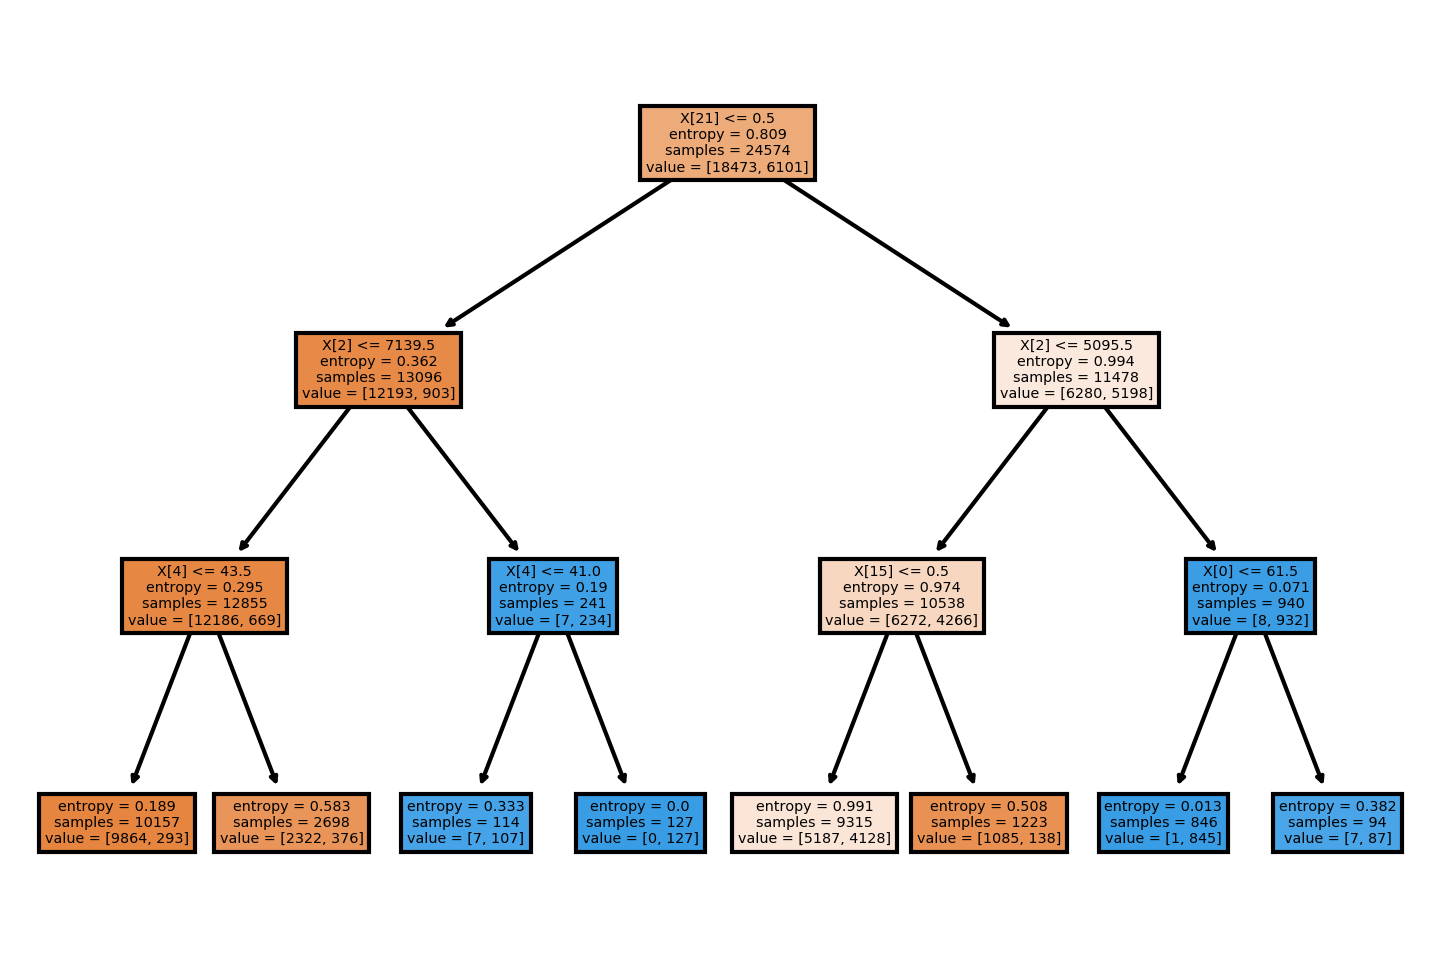

In [8]:
import matplotlib.pyplot as plt

fig=plt.figure(dpi=300)
tree.plot_tree(t, filled=True)

(5) 분기를 찾는 기준을 gini impurity로 바꾸었을 때 어떻게 바뀌게 되는지 모델의 성능과 생성되는 규칙 측면에서 설명하시오. 

In [12]:
t1=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=100,min_samples_leaf=50)
t1.fit(trnX, trnY)

y_pred_t1=t1.predict(valX)

print('accuracy_score:',accuracy_score(valY,y_pred_t1))

accuracy_score: 0.8095703125


In [13]:
from sklearn.metrics import classification_report

print(classification_report(valY, y_pred_t1, target_names=['class0', 'class1']))

              precision    recall  f1-score   support

      class0       0.80      1.00      0.89      4595
      class1       0.96      0.26      0.40      1549

    accuracy                           0.81      6144
   macro avg       0.88      0.63      0.65      6144
weighted avg       0.84      0.81      0.77      6144



[Text(697.5, 792.75, 'X[21] <= 0.5\ngini = 0.373\nsamples = 24574\nvalue = [18473, 6101]'),
 Text(348.75, 566.25, 'X[2] <= 7139.5\ngini = 0.128\nsamples = 13096\nvalue = [12193, 903]'),
 Text(174.375, 339.75, 'X[4] <= 43.5\ngini = 0.099\nsamples = 12855\nvalue = [12186, 669]'),
 Text(87.1875, 113.25, 'gini = 0.056\nsamples = 10157\nvalue = [9864, 293]'),
 Text(261.5625, 113.25, 'gini = 0.24\nsamples = 2698\nvalue = [2322, 376]'),
 Text(523.125, 339.75, 'X[2] <= 9088.0\ngini = 0.056\nsamples = 241\nvalue = [7, 234]'),
 Text(435.9375, 113.25, 'gini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(610.3125, 113.25, 'gini = 0.021\nsamples = 187\nvalue = [2, 185]'),
 Text(1046.25, 566.25, 'X[2] <= 5095.5\ngini = 0.496\nsamples = 11478\nvalue = [6280, 5198]'),
 Text(871.875, 339.75, 'X[3] <= 1782.5\ngini = 0.482\nsamples = 10538\nvalue = [6272, 4266]'),
 Text(784.6875, 113.25, 'gini = 0.47\nsamples = 9913\nvalue = [6175, 3738]'),
 Text(959.0625, 113.25, 'gini = 0.262\nsamples = 625\nvalue = [

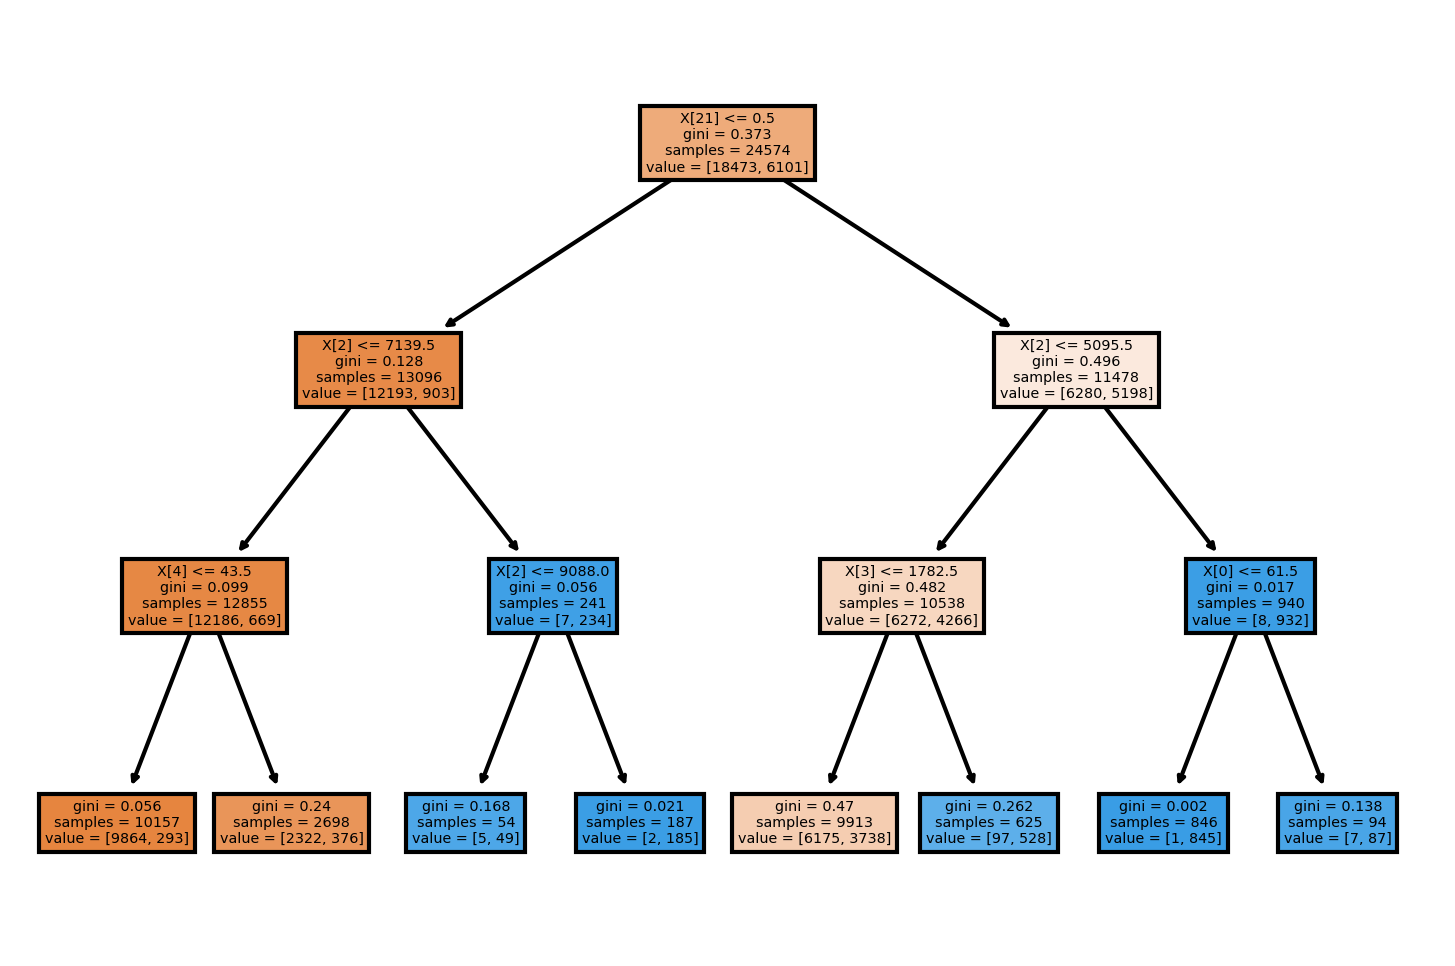

In [15]:
fig=plt.figure(dpi=300)
tree.plot_tree(t1, filled=True)

In [ ]:
#모델 성능에 대한 설명: tree가 분류되는 구조는 동일하나 'entropy'로 모델을 만들었을 때의 성능이 더 좋은 것을 알 수 있다.

## 3. $k$-neares neighbor model 학습

nearest neighbor 방식을 이용해서 분류 문제를 해결하려고 한다. 사용하는 데이터는 감마선 망원경으로 관측될 결과를 바탕으로 고에너지 감마선을 검출하는 것이 목적이다. 이 데이터는 총 11개의 변수로 구성되어 있고 이준 10개는 설명 변수이고 마지막 ‘class’ 변수가 종속 변수이다. 

1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)

데이터는 학습용 데이터와 검증용 데이터로 나누어서 사용하려고 하는데 이 부분의 코드를 수정하지 말고 그대로 사용한다. 학습용 데이터는 (trnX, trnY)이고 검증용 데이터는 (valX,valY)이다. 

In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)

(1) k-NN 방식으로 예측을 하려고 한다. 이 때 가장 적절한 k를 결정하기 위해서 학습용 데이터로 검증용 데이터를 예측하고 검증용 데이터에서의 정확도를 비교해보고자 한다. k는 1, 5, 9, 13, 17로 바꿔보면서 테스트 해본다고 했을 때 검증용 데이터에서의 정확도를 각각의 경우에 대해서 구하시오.

In [11]:
k=[1, 5, 9, 13, 17]

for i in range(len(k)):
    num_k=k[i]
    
    knn_clf=KNeighborsClassifier(n_neighbors=num_k)
    knn_clf.fit(trnX,trnY)
    y_pred=knn_clf.predict(valX)
    knn_acscore=knn_clf.score(valX,valY)
    
    print('k=', num_k, '일때 accuracy:' ,knn_acscore)

k= 1 일때 accuracy: 0.7810199789695058
k= 5 일때 accuracy: 0.8017875920084122
k= 9 일때 accuracy: 0.8138801261829653
k= 13 일때 accuracy: 0.8165089379600421
k= 17 일때 accuracy: 0.814143007360673


(2) 검증용 데이터 중에서 첫 번째 샘플의 20개의 neighbor를 해당 샘플과 함께 산포도로 그리시오. 이 때 사용하는 변수는 x축은 fLenght, y축은 fConc로 하고 가장 가까운 10개와 나머지 10개에 대해서는 구분이 되도록 하시오(색이나 마커로). 또한, y축의 경우에는 (-5, 5)까지를 표시하시오. 

참고: https://matplotlib.org/examples/pylab_examples/scatter_star_poly.html
         https://matplotlib.org/examples/pylab_examples/step_demo.html 

In [23]:
knn_clf=KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(trnX,trnY)

y_pred=knn_clf.predict(valX)

nn=knn_clf.kneighbors(valX)
nn

(array([[ 9.1921314 , 11.50203313, 11.76244063, ..., 15.72098169,
         15.88699918, 16.24152875],
        [ 4.17054664,  6.34243739,  6.4501065 , ..., 14.04274155,
         14.07674922, 14.25406597],
        [ 9.68917879, 12.88052461, 15.42254475, ..., 19.6870956 ,
         19.9633348 , 19.99336935],
        ...,
        [15.74900584, 16.2517144 , 16.62901094, ..., 22.20197269,
         22.22275388, 22.53984734],
        [15.05626318, 15.22462863, 15.4026551 , ..., 21.84500461,
         21.94266834, 22.67144445],
        [ 4.22101223,  4.59818865,  5.04362125, ..., 14.52526407,
         14.88225519, 15.16968898]]),
 array([[13507,  4081,   510, ..., 11837, 13495,  9800],
        [12466,  7062, 11623, ...,  1212,  6392,  2725],
        [ 6185,   808,  3861, ...,   998,  4660, 14225],
        ...,
        [ 5726, 11498,  5054, ...,  7847,  9241, 13229],
        [12437,  4349,  5568, ...,  8500, 13522, 14770],
        [ 3981,  8014,  5300, ...,  7131,  6282, 12960]], dtype=int64))

In [62]:
y_prob=knn_clf.predict_proba(valX)

In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg=KNeighborsRegressor(n_neighbors=20)
knn_reg.fit(trnX,trnY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [63]:
Xts=np.linspace(0,10,50)
y_pred=knn_reg.predict(Xts)

In [15]:
train=pd.DataFrame(X,y)
point=valX[:20]

In [17]:
from sklearn.metrics import pairwise_distances

train['dist']=pairwise_distances([point],train,metric='euclidean')[0]

In [18]:
sort_train=train.sort_values(by=['dist'],axis=0)
knn_index=sort.train.iloc[range(k)].index.values
not_nn_index=np.setdiff1d(range(n), knn_index)

(3) 이번에는 같은 데이터를 이용해서 예측을 진행하는데 그 전에 전체 데이터에 대해서 개별 변수를 표준화하고자 한다. 개별 변수를 평균은 0, 분산이 1이 되게끔 표준화하는 함수를 작성하고 이를 이용해서 전체 데이터를 표준화한 다음에 (1)에서 사용한 것과 동일하게 학습용 데이터와 검증용 데이터로 분할한 다음(X자리에 표준화한 데이터를 넣을 것)에 서로 다른 k=[1, 5, 9, 13, 17]에 대한 검증용 데이터에 대한 정확도를 계산하시오.

In [27]:
X=magic[magic.columns[:-1]].values
y=magic['class'].values

In [42]:
from sklearn.preprocessing import StandardScaler

X_tol=X.tolist()
scaler=StandardScaler()
X_norm=scaler.fit(X_tol)

In [43]:
print(scaler.transform(X_tol))

[[-0.57722602 -0.33680419 -0.38113037 ... -0.40584194  0.47681587
  -1.49786555]
 [-0.51096889 -0.57002666 -0.64859479 ... -0.49009359 -0.81541816
   0.15312459]
 [ 2.56827756  6.20585836  2.61578306 ... -2.18302986  1.88922413
   0.84263513]
 ...
 [ 0.52392318  1.38177927  1.31887687 ... -0.4665087   0.10163583
   0.83900338]
 [ 1.58775746  2.98278123  2.47337518 ... -3.07720555  2.18525981
   2.87032093]
 [ 3.16145936  1.67999288  0.81314905 ...  1.49930076  0.96101431
   1.05044239]]


In [45]:
trnX,valX,trnY,valY=train_test_split(scaler.transform(X_tol),y,test_size=0.2,random_state=10, stratify=y)

In [46]:
k=[1, 5, 9, 13, 17]

for i in range(len(k)):
    num_k=k[i]
    
    knn_clf=KNeighborsClassifier(n_neighbors=num_k)
    knn_clf.fit(trnX,trnY)
    y_pred=knn_clf.predict(valX)
    knn_acscore=knn_clf.score(valX,valY)
    
    print('k=', num_k, '일때 accuracy:' ,knn_acscore)

k= 1 일때 accuracy: 0.8217665615141956
k= 5 일때 accuracy: 0.8443743427970557
k= 9 일때 accuracy: 0.8404311251314406
k= 13 일때 accuracy: 0.8393796004206099
k= 17 일때 accuracy: 0.8412197686645636


In [66]:
s=trnX.var(axis=0)

knn_clf_2=KNeighborsClassifier(n_neighbors=1, metric='euclidean', metric_params={'V':s})

In [70]:
cov_mat=np.cov(trnX.T)
knn_clf_3=KNeighborsClassifier(n_neighbors=3, metric)